### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/asdf/Downloads/Classwork/Sem 5/DBMS/Datasets/loan_approval_dataset.csv")
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


### Import sklearn libraries

In [4]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

#### Set y

In [5]:
CODE = {'Approved': 1, 'Rejected': 0}
df['loan_status'] = df['loan_status'].map(CODE)
y = df['loan_status']
y

0       1
1       0
2       0
3       0
4       0
       ..
4264    0
4265    1
4266    0
4267    1
4268    1
Name: loan_status, Length: 4269, dtype: int64

#### Set x

In [6]:
x = df.drop(['loan_id', 'loan_status'], axis = 1)
x = pd.get_dummies(x, dtype = 'int')
x

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_Graduate,education_Not Graduate,self_employed_No,self_employed_Yes
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,0,1,0
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,1,0,1
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1,0,1,0
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1,0,1,0
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,1000000,2300000,12,317,2800000,500000,3300000,800000,1,0,0,1
4265,0,3300000,11300000,20,559,4200000,2900000,11000000,1900000,0,1,0,1
4266,2,6500000,23900000,18,457,1200000,12400000,18100000,7300000,0,1,1,0
4267,1,4100000,12800000,8,780,8200000,700000,14100000,5800000,0,1,1,0


#### Train-Test split

In [7]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 42)

### Example: Model 1 - Decision Tree Classifier

In [8]:
mod1 = DecisionTreeClassifier(max_depth=5)
mod1.fit(xtrain, ytrain)
pred1 = mod1.predict(xtest)
print(classification_report(ytest, pred1))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       318
           1       0.99      0.96      0.98       536

    accuracy                           0.97       854
   macro avg       0.96      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854



### Confusion Matrix

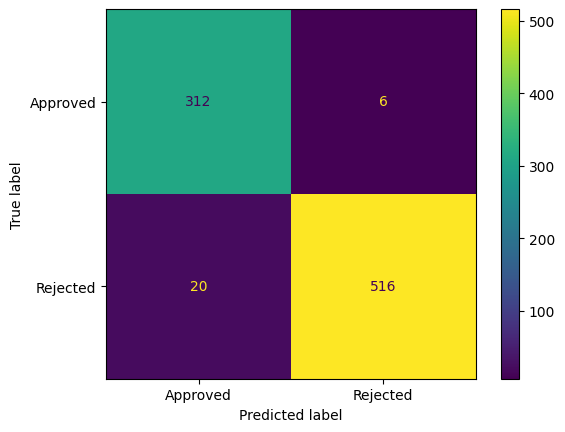

In [9]:
conf_mat = confusion_matrix(ytest, pred1)

ConfusionMatrixDisplay(conf_mat, display_labels=['Approved', 'Rejected']).plot()

### Decision Tree Plot

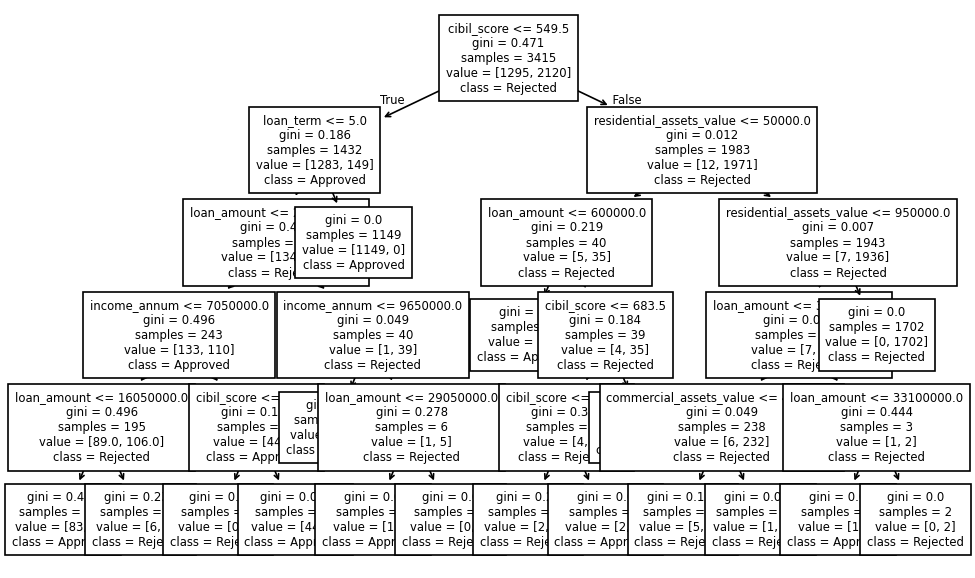

In [10]:
x_cols = x.columns
plt.figure(figsize=(10, 6),dpi=120)
plot_tree(mod1, fontsize=7, feature_names=x_cols, class_names=('Approved', 'Rejected'));

##### Extract features that influence loan_status and convert them to df

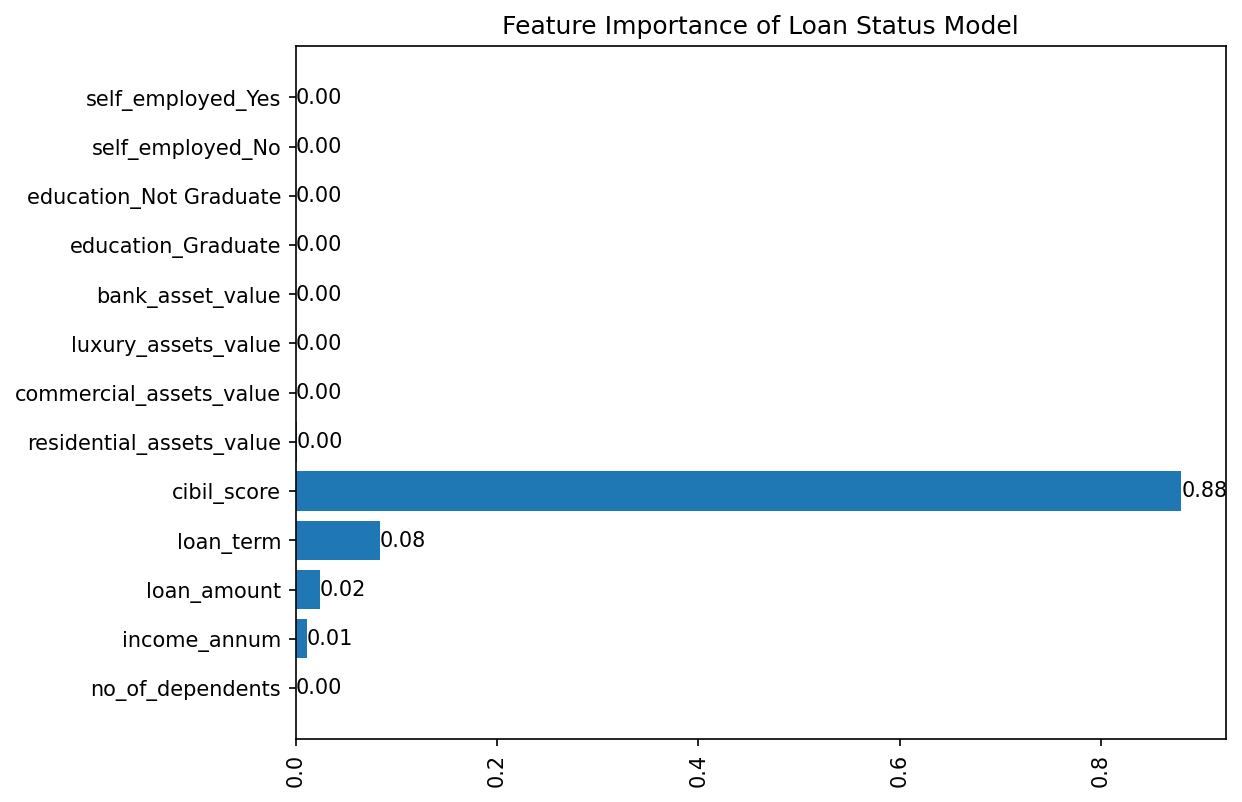

In [11]:
feat_imp = mod1.feature_importances_

plt.figure(figsize = (8, 6), dpi = 150)
bars = plt.barh(y = x_cols, width = feat_imp);
plt.bar_label(bars, fmt ='%1.2f')
plt.xticks(rotation = 90)
plt.title('Feature Importance of Loan Status Model')
plt.show()

## Balancing the Dataset

#### Check size of 'Approved' and 'Rejected' loan_status

In [12]:
df['loan_status'].value_counts()

loan_status
1    2656
0    1613
Name: count, dtype: int64

##### Split the dataset in to 2 classes:
- df_maj = Approved
- df_min = Rejected

In [13]:
df_min = df[ df['loan_status']==0 ]
df_maj = df[ df['loan_status']==1 ]

##### Downsample the majority data frame (loan_status = Approved / 1) to equal the minority data frame (loan_status = Rejected / 0)

In [14]:
df_maj_downsampled = df_maj.sample(n=len(df_min), replace = False, random_state = 42)

##### Combine downsampled data frame with minority data frame

In [15]:
df_ds = pd.concat([df_maj_downsampled, df_min])
df_ds.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
1351,1352,4,Not Graduate,No,4200000,15500000,18,794,7300000,700000,13400000,2200000,1
215,216,3,Graduate,Yes,6900000,16400000,4,787,11100000,6100000,26400000,3800000,1
2566,2567,4,Not Graduate,Yes,2200000,8600000,2,461,1400000,3000000,4700000,2100000,1
2620,2621,2,Not Graduate,Yes,5000000,10700000,2,753,12600000,9000000,11500000,5700000,1
1139,1140,1,Graduate,Yes,6400000,17300000,10,879,10000000,1100000,15400000,8200000,1


##### Shuffle the data frame

In [16]:
df_sf = df_ds.sample(frac = 1, random_state = 42).reset_index(drop = True)
print(df_ds['loan_status'].value_counts())

loan_status
1    1613
0    1613
Name: count, dtype: int64


### Set x and y after balancing

In [17]:
y = df_sf['loan_status']
x = df_sf.drop(['loan_id', 'loan_status'], axis = 1)
x.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,1,Graduate,Yes,6700000,18800000,6,798,8700000,5900000,18000000,6100000
1,2,Not Graduate,Yes,9800000,34600000,16,754,12400000,14900000,34700000,6100000
2,2,Graduate,No,8400000,23100000,6,689,5700000,2500000,18900000,11900000
3,5,Graduate,Yes,5200000,12700000,16,718,11700000,100000,18100000,7200000
4,4,Graduate,No,300000,1100000,4,359,100000,0,1000000,200000


##### Convert text columns to int

In [18]:
x = pd.get_dummies(x, dtype = 'int')
x.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_Graduate,education_Not Graduate,self_employed_No,self_employed_Yes
0,1,6700000,18800000,6,798,8700000,5900000,18000000,6100000,1,0,0,1
1,2,9800000,34600000,16,754,12400000,14900000,34700000,6100000,0,1,0,1
2,2,8400000,23100000,6,689,5700000,2500000,18900000,11900000,1,0,1,0
3,5,5200000,12700000,16,718,11700000,100000,18100000,7200000,1,0,0,1
4,4,300000,1100000,4,359,100000,0,1000000,200000,1,0,1,0


## Running the models after balancing

### Without Stratify

In [19]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 42)

### Model 1 - Decision Tree Classifier

In [20]:
mod1 = DecisionTreeClassifier(max_depth = 5)
mod1.fit(xtrain, ytrain)
pred_dtc = mod1.predict(xtest)
print(classification_report(ytest, pred_dtc))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       335
           1       1.00      0.93      0.97       311

    accuracy                           0.97       646
   macro avg       0.97      0.97      0.97       646
weighted avg       0.97      0.97      0.97       646



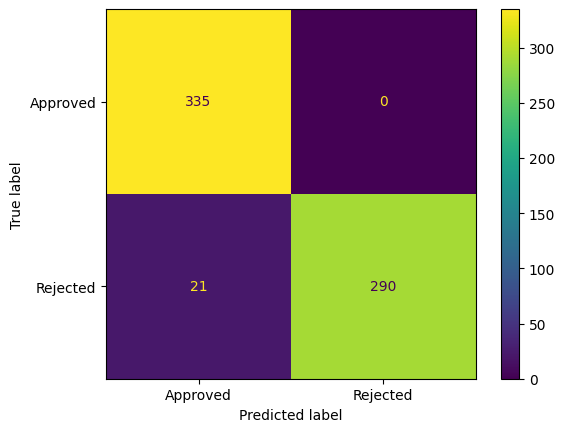

In [21]:
conf_mat = confusion_matrix(ytest, pred_dtc)

ConfusionMatrixDisplay(conf_mat, display_labels=['Approved', 'Rejected']).plot()

### Model 2 - Random Forest Classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
mod2 = RandomForestClassifier(n_estimators = 1000, max_depth = 7, min_samples_split = 5, min_samples_leaf = 2)
mod2.fit(xtrain, ytrain)
pred_rfc = mod2.predict(xtest)
print(classification_report(ytest, pred_rfc))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       335
           1       0.99      0.95      0.97       311

    accuracy                           0.97       646
   macro avg       0.98      0.97      0.97       646
weighted avg       0.97      0.97      0.97       646



### Model 3 - K Neighbors Classifier

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
mod3 = KNeighborsClassifier()
mod3.fit(xtrain, ytrain)
pred_kn = mod3.predict(xtest)
print(classification_report(ytest, pred_kn))

              precision    recall  f1-score   support

           0       0.51      0.50      0.50       335
           1       0.47      0.49      0.48       311

    accuracy                           0.49       646
   macro avg       0.49      0.49      0.49       646
weighted avg       0.49      0.49      0.49       646



## Train-Test Using Stratify

In [26]:
# Train-Test Split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify = y)

#### Revised DTC 

In [27]:
mod4 = DecisionTreeClassifier(max_depth = 5)
mod4.fit(xtrain, ytrain)
pred_dtc = mod4.predict(xtest)
print(classification_report(ytest, pred_dtc))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       323
           1       1.00      0.95      0.97       323

    accuracy                           0.98       646
   macro avg       0.98      0.98      0.98       646
weighted avg       0.98      0.98      0.98       646



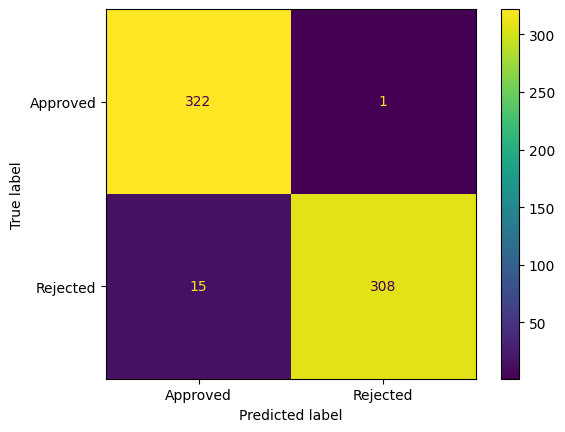

In [28]:
conf_mat = confusion_matrix(ytest, pred_dtc)

ConfusionMatrixDisplay(conf_mat, display_labels=['Approved', 'Rejected']).plot()

#### Revised RFC

In [29]:
mod5 = RandomForestClassifier(n_estimators = 1000, max_depth = 7, min_samples_split = 5, min_samples_leaf = 2)
mod5.fit(xtrain, ytrain)
pred_rfc = mod5.predict(xtest)
print(classification_report(ytest, pred_rfc))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       323
           1       1.00      0.96      0.98       323

    accuracy                           0.98       646
   macro avg       0.98      0.98      0.98       646
weighted avg       0.98      0.98      0.98       646



#### Revised KNC

In [30]:
mod6 = KNeighborsClassifier()
mod6.fit(xtrain, ytrain)
pred_kn = mod6.predict(xtest)
print(classification_report(ytest, pred_kn))

              precision    recall  f1-score   support

           0       0.54      0.54      0.54       323
           1       0.54      0.53      0.53       323

    accuracy                           0.54       646
   macro avg       0.54      0.54      0.54       646
weighted avg       0.54      0.54      0.54       646



## Hyperparameter Optimization Based On Bayesian Optimization

In [33]:
from skopt import BayesSearchCV

 ### 1. Decision Tree Classification

In [34]:
params = {
    'max_depth': (3, 30),
    'min_samples_split': (2, 20),
    'min_samples_leaf': (1, 10),
    'criterion': ('gini', 'entropy', 'log_loss')
}

In [35]:
opt = BayesSearchCV(estimator = mod4, search_spaces = params, cv = 3, n_jobs = 3)
opt

,estimator,DecisionTreeC...r(max_depth=5)
,search_spaces,"{'criterion': ('gini', ...), 'max_depth': (3, ...), 'min_samples_leaf': (1, ...), 'min_samples_split': (2, ...)}"
,optimizer_kwargs,None
,n_iter,50
,scoring,None
,fit_params,None
,n_jobs,3
,n_points,1
,iid,'deprecated'
,refit,True
,cv,3


In [36]:
opt.fit(xtrain, ytrain)

,estimator,DecisionTreeC...r(max_depth=5)
,search_spaces,"{'criterion': ('gini', ...), 'max_depth': (3, ...), 'min_samples_leaf': (1, ...), 'min_samples_split': (2, ...)}"
,optimizer_kwargs,None
,n_iter,50
,scoring,None
,fit_params,None
,n_jobs,3
,n_points,1
,iid,'deprecated'
,refit,True
,cv,3


In [37]:
print(opt.best_params_)
print(opt.best_score_)

OrderedDict({'criterion': 'log_loss', 'max_depth': 17, 'min_samples_leaf': 8, 'min_samples_split': 19})
0.9767441860465116


#### Final Model

In [49]:
f_mod4 = opt.best_estimator_
pred_1 = f_mod4.predict(xtest)
print(classification_report(ytest, pred_1))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       323
           1       0.99      0.97      0.98       323

    accuracy                           0.98       646
   macro avg       0.98      0.98      0.98       646
weighted avg       0.98      0.98      0.98       646



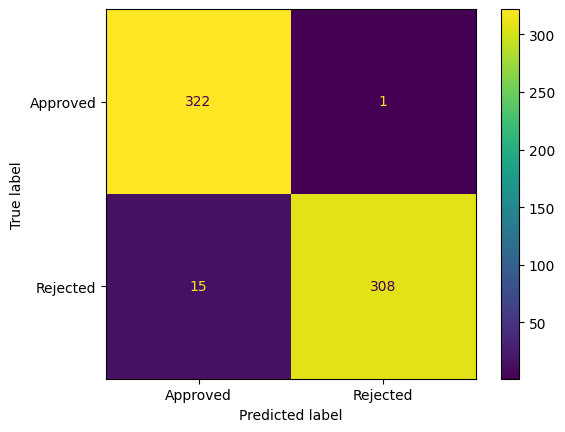

In [41]:
conf_mat = confusion_matrix(ytest, pred_1)

ConfusionMatrixDisplay(conf_mat, display_labels=['Approved', 'Rejected']).plot()

### 2. Random Forrest Classification

In [42]:
params = {
    'n_estimators': (150, 1000), 
    'max_depth': (5, 15), 
    'criterion': ("gini", "entropy", "log_loss")
    }

In [43]:
opt = BayesSearchCV(estimator = mod5, search_spaces = params, cv = 3, n_jobs = 3)
opt

,estimator,RandomForestC...timators=1000)
,search_spaces,"{'criterion': ('gini', ...), 'max_depth': (5, ...), 'n_estimators': (150, ...)}"
,optimizer_kwargs,None
,n_iter,50
,scoring,None
,fit_params,None
,n_jobs,3
,n_points,1
,iid,'deprecated'
,refit,True
,cv,3


In [44]:
opt.fit(xtrain, ytrain)

,estimator,RandomForestC...timators=1000)
,search_spaces,"{'criterion': ('gini', ...), 'max_depth': (5, ...), 'n_estimators': (150, ...)}"
,optimizer_kwargs,None
,n_iter,50
,scoring,None
,fit_params,None
,n_jobs,3
,n_points,1
,iid,'deprecated'
,refit,True
,cv,3


In [45]:
print(opt.best_params_)
print(opt.best_score_)

OrderedDict({'criterion': 'entropy', 'max_depth': 14, 'n_estimators': 153})
0.9713178294573644


#### Final Model

In [ ]:
f_mod5 = opt.best_estimator_
f_mod5.fit(xtrain, ytrain)
pred_2 = f_mod5.predict(xtest)
print(classification_report(ytest, pred_2))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       323
           1       0.99      0.98      0.98       323

    accuracy                           0.98       646
   macro avg       0.98      0.98      0.98       646
weighted avg       0.98      0.98      0.98       646



### 3. K Neighbors Classification

In [50]:
params = {
    'n_neighbors': (1, 50),
    'weights': ("uniform", "distance"),
    'p': (1, 2),
    'leaf_size': (10, 50)
}

In [51]:
opt = BayesSearchCV(estimator = mod6, search_spaces = params, n_iter = 30, cv = 3, n_jobs = 3)
opt

,estimator,KNeighborsClassifier()
,search_spaces,"{'leaf_size': (10, ...), 'n_neighbors': (1, ...), 'p': (1, ...), 'weights': ('uniform', ...)}"
,optimizer_kwargs,None
,n_iter,30
,scoring,None
,fit_params,None
,n_jobs,3
,n_points,1
,iid,'deprecated'
,refit,True
,cv,3


In [52]:
opt.fit(xtrain, ytrain)

c:\Users\asdf\AppData\Local\Programs\Python\Python312\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(10), np.int64(1), np.int64(1), np.str_('uniform')] before, using random point [np.int64(43), np.int64(43), np.int64(1), 'distance']
  warnings.warn(


,estimator,KNeighborsClassifier()
,search_spaces,"{'leaf_size': (10, ...), 'n_neighbors': (1, ...), 'p': (1, ...), 'weights': ('uniform', ...)}"
,optimizer_kwargs,None
,n_iter,30
,scoring,None
,fit_params,None
,n_jobs,3
,n_points,1
,iid,'deprecated'
,refit,True
,cv,3


In [53]:
print(opt.best_params_)
print(opt.best_score_)

OrderedDict({'leaf_size': 10, 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'})
0.5414728682170543


#### Final Model

In [54]:
f_mod6 = opt.best_estimator_
f_mod6.fit(xtrain, ytrain)
pred_3 = f_mod6.predict(xtest)
print(classification_report(ytest, pred_3))

              precision    recall  f1-score   support

           0       0.51      0.53      0.52       323
           1       0.52      0.50      0.51       323

    accuracy                           0.52       646
   macro avg       0.52      0.52      0.52       646
weighted avg       0.52      0.52      0.52       646

